In [2]:
# Import
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import torch
from torchvision import models, transforms
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture
import umap
import matplotlib.pyplot as plt
import sys
import clip
import pandas

module_path = os.path.abspath(os.path.join('..', '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Preprocessing
from joblib import Parallel, delayed
import utils
from utils import grayscale_directory, clahe_directory, apply_denoise_tv_chambolle_directory, circle_crop_directory, create_comparison_file, analyseClustering

# Distance computing
from kornia_matcher import extract_kornia_matches_in_directory
import pandas as pd

# Clustering
#from sklearn.cluster import AgglomerativeClustering
import hdbscan

In [3]:
# Variables
import variables



## Preprocessing obverse
exp1_obverse = os.path.join(variables.results_directory_obverse, "01_grayscale") # variables.results_directory+"01_grayscale\\"
exp2_obverse = os.path.join(variables.results_directory_obverse, "02_histogram_equalization")
exp3_obverse = os.path.join(variables.results_directory_obverse, "03_denoise")
exp4_obverse = os.path.join(variables.results_directory_obverse, "04_histogram_equalization")
exp5_obverse = os.path.join(variables.results_directory_obverse, "05_circle_crop")
folders_obverse = [exp1_obverse, exp2_obverse, exp3_obverse, exp4_obverse, exp5_obverse]

preprocessed_images_path_obverse = exp5_obverse
images_folder_path_obverse = variables.images_directory_obverse

## Distance computing obverse
matching_file_path_obverse = variables.results_directory_obverse + variables.matching_file_name_obverse
clustering_file_path_obverse = variables.results_directory_obverse + variables.clustering_file_name_obverse
#graph_file_path = variables.results_directory + variables.graph_file_name

## Preprocessing reverse
exp1_reverse = os.path.join(variables.results_directory_reverse, "01_grayscale") # variables.results_directory+"01_grayscale\\"
exp2_reverse = os.path.join(variables.results_directory_reverse, "02_histogram_equalization")
exp3_reverse = os.path.join(variables.results_directory_reverse, "03_denoise")
exp4_reverse = os.path.join(variables.results_directory_reverse, "04_histogram_equalization")
exp5_reverse = os.path.join(variables.results_directory_reverse, "05_circle_crop")
folders_reverse = [exp1_reverse, exp2_reverse, exp3_reverse, exp4_reverse, exp5_reverse]

preprocessed_images_path_reverse = exp5_reverse
images_folder_path_reverse = variables.images_directory_reverse

In [3]:
if not os.path.exists(variables.results_directory_obverse):
    os.mkdir(variables.results_directory_obverse)
for folder in folders_obverse:
    if not os.path.exists(folder):
        os.mkdir(folder)
        
if not os.path.exists(variables.results_directory_reverse):
    os.mkdir(variables.results_directory_reverse)
for folder in folders_reverse:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [1]:
grayscale_directory(variables.images_directory_obverse, exp1_obverse)
grayscale_directory(variables.images_directory_reverse, exp1_reverse)

clahe_directory(exp1_obverse, exp2_obverse)
clahe_directory(exp1_reverse, exp2_reverse)

apply_denoise_tv_chambolle_directory(exp2_obverse, exp3_obverse, weight=0.5)
apply_denoise_tv_chambolle_directory(exp2_reverse, exp3_reverse, weight=0.5)

clahe_directory(exp3_obverse, exp4_obverse)
clahe_directory(exp3_reverse, exp4_reverse)

circle_crop_directory(exp4_obverse, exp5_obverse)
circle_crop_directory(exp4_reverse, exp5_reverse)

NameError: name 'grayscale_directory' is not defined

In [4]:
def create_text_description(row):
    return (f"A Celtic coin with {row['Weight']} grams weight, "
            f"{row['Diameter max.']} mm diameter. "
            f"The obverse shows {row['Obverse design']}."
            #f"Reverse shows {row['Reverse design']}."
            )

df = pd.read_csv("C:\\Users\\edvin\\Desktop\\DataChallenge\\bushel_series_DataChallenge_2025-numisdata4-2_TypenEinzeln_cleaned.csv")
df["description"] = df.apply(create_text_description, axis=1)


In [5]:
import variables

image_folder_obv = exp5_obverse
image_folder_rev = exp5_reverse
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [6]:
filenames = []
for root, _, files in os.walk(image_folder_obv):
    for fname in sorted(files):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(root, fname)
            try:
                filenames.append(os.path.relpath(path, image_folder_obv))
            except Exception as e:
                print(f"Error with {fname}: {e}")


In [7]:
import os
import re

# List all image filenames
image_folders = exp5_obverse

image_ids = []

image_files = os.listdir(image_folders)  
for fname in image_files:
    print(fname)
    match = re.search(r'([0-9]{3,4})', fname)  
    if match:
        image_ids.append(int(match.group(1)))

filtered_df = df[df['Id'].isin(image_ids)].copy()


3583_a.jpg
3585_a.jpg
3586_a.jpg
3589_a.jpg
3590_a.jpg
3595_a.jpg
3603_a.jpg
3604_a.jpg
3605_a.jpg
3609_a.jpg
3612_a.jpg
3613_a.jpg
3614_a.jpg
3618_a.jpg
3619_a.jpg
3621_a.jpg
3623_a.jpg
3627_a.jpg
3628_a.jpg
3629_a.jpg
3630_a.jpg
3631_a.jpg
3632_a.jpg
3633_a.jpg
3634_a.jpg
3635_a.jpg
3636_a.jpg
3637_a.jpg
3638_a.jpg
3639_a.jpg
3640_a.jpg
3641_a.jpg
3642_a.jpg
3643_a.jpg
3644_a.jpg
3645_a.jpg
3646_a.jpg
3647_a.jpg
3648_a.jpg
3649_a.jpg
3650_a.jpg
3651_a.jpg
3654_a.jpg
3657_a.jpg
3658_a.jpg
3659_a.jpg
3660_a.jpg
3661_a.jpg
3662_a.jpg
3663_a.jpg
3664_a.jpg
3665_a.jpg
3666_a.jpg
3667_a.jpg
3668_a.jpg
3669_a.jpg
3670_a.jpg
3672_a.jpg
3673_a.jpg
3674_a.jpg
3675_a.jpg
3676_a.jpg
3677_a.jpg
3678_a.jpg
3679_a.jpg
3680_a.jpg
3681_a.jpg
3682_a.jpg
3683_a.jpg
3684_a.jpg
3685_a.jpg
3686_a.jpg
3687_a.jpg
3688_a.jpg
3689_a.jpg
3690_a.jpg
3691_a.jpg
3692_a.jpg
3693_a.jpg
3694_a.jpg
3695_a.jpg
3696_a.jpg
3697_a.jpg
3698_a.jpg
3699_a.jpg
3708_a.jpg
3709_a.jpg
3710_a.jpg
3711_a.jpg
3712_a.jpg
3713_a.jpg

In [45]:
def extract_clip_feature(image_path):
    img = preprocess(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model.encode_image(img).cpu().numpy().squeeze()
    return features

def get_all_features(folder):
    features, filenames = [], []
    for root, _, files in os.walk(folder):
        for fname in sorted(files):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                path = os.path.join(root, fname)
                try:
                    features.append(extract_clip_feature(path))
                    filenames.append(os.path.relpath(path, folder))
                except Exception as e:
                    print(f"Error with {fname}: {e}")
    return np.array(features), filenames

features_obv, filenames_obv = get_all_features(image_folder_obv)
#features_rev, filenames_rev = get_all_features(image_folder_rev)

In [8]:
def get_clip_image_and_text_embeddings(df, image_folder, id_column='Id', description_column='description'):
    
    image_embeddings = []
    text_embeddings = []
    valid_filenames = []

    for _, row in tqdm(df.iterrows(), total=len(df)):
        coin_id = str(row[id_column])

        matched_file = None
        for fname in os.listdir(image_folder):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')) and fname.startswith(coin_id):
                matched_file = fname
                break

        if matched_file is None:
            print(f"No image found for ID {coin_id}")
            continue

        image_path = os.path.join(image_folder, matched_file)

        try:
            # === Image Embedding ===
            img = preprocess(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device)
            with torch.no_grad():
                image_features = model.encode_image(img)
            image_features /= image_features.norm(dim=-1, keepdim=True)
            image_embeddings.append(image_features.cpu())

            # === Text Embedding ===
            text = clip.tokenize([row[description_column]], truncate=True).to(device)
            with torch.no_grad():
                text_features = model.encode_text(text)
            text_features /= text_features.norm(dim=-1, keepdim=True)
            text_embeddings.append(text_features.cpu())

            valid_filenames.append(matched_file)

        except Exception as e:
            print(f"Error processing {matched_file}: {e}")
            continue

    return image_embeddings, text_embeddings, valid_filenames

In [9]:

features_obv, text_embeddings_obv, filenames_obv = get_clip_image_and_text_embeddings(filtered_df, image_folder_obv)
#features_rev, text_embeddings_rev, filenames_rev = get_clip_image_and_text_embeddings(filtered_df, image_folder_rev)


100%|██████████| 192/192 [00:18<00:00, 10.18it/s]


In [10]:
text_embeddings = torch.cat(text_embeddings_obv, dim=0)  
image_embeddings = torch.cat(features_obv, dim=0)

#text_embeddings = torch.cat(text_embeddings_rev, dim=0)  
#image_embeddings = torch.cat(features_rev, dim=0)


In [11]:
combined = (image_embeddings + text_embeddings) / 2

In [12]:
print(combined.shape)

torch.Size([192, 512])


In [13]:

def embed_and_cluster(feats: torch.Tensor | np.ndarray,
                      n_pca=50, n_umap=2,
                      n_components=30) -> tuple[np.ndarray, np.ndarray]:
    # Convert to NumPy if it's a PyTorch tensor
    if isinstance(feats, torch.Tensor):
        feats = feats.cpu().numpy()

    # 1) PCA
    pca = PCA(n_components=n_pca, random_state=42)
    feats_pca = pca.fit_transform(feats)

    # 2) Bayesian Gaussian Mixture clustering
    bgmm = BayesianGaussianMixture(
        n_components=n_components,
        weight_concentration_prior_type="dirichlet_process",
        weight_concentration_prior=0.5,
        covariance_type="full",
        random_state=42
    )
    labels = bgmm.fit_predict(feats_pca)

    # 3) UMAP for 2D embedding
    coords = umap.UMAP(
        n_components=n_umap,
        min_dist=0.1,
        random_state=42
    ).fit_transform(feats_pca)

    return coords, labels



In [14]:
# Pfade aus variables.py oder manuell setzen
#obv_folder = image_folder_obv
#rev_folder = image_folder_rev

# ---------- Obverse ----------
obv_feats, obv_files = features_obv, filenames_obv
obv_xy, obv_labels = embed_and_cluster(combined)
#rev_feats, rev_files = features_rev, filenames_rev
#rev_xy, rev_labels = embed_and_cluster(combined)
obv_df = pd.DataFrame({
    "base_name": [f.split("_")[0] for f in obv_files],   # „Coin23_obv“ → „Coin23“
    "x": obv_xy[:, 0],
    "y": obv_xy[:, 1],
    "obverse_group": obv_labels
})

# ---------- Reverse ----------
#rev_feats, rev_files = features_rev, filenames_rev
#rev_xy, rev_labels = embed_and_cluster(rev_feats)
#rev_df = pd.DataFrame({
 #   "base_name": [f.split("_")[0] for f in rev_files],   # „Coin23_rev“ → „Coin23“
  #  "reverse_group": rev_labels
#})


c:\Users\edvin\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


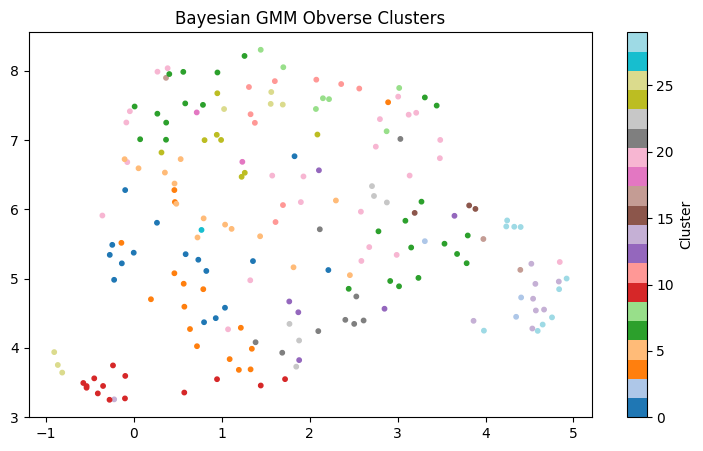

In [15]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(obv_xy[:, 0], obv_xy[:, 1], c=obv_labels, cmap='tab20', s=10)
plt.title("Bayesian GMM Obverse Clusters")
plt.colorbar(label="Cluster")

In [41]:
#full = obv_df.merge(rev_df, on="base_name", how="inner")
#obv_df = obv_df.rename(columns={"base_name": "name"}, inplace=True)
obv_df.to_csv("coins_for_viewer_2_modal_reverse_GT.csv", index=False)


In [83]:
pca = PCA(n_components=100, random_state=42)
feats_pca = pca.fit_transform(combined)

In [84]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=2,        
    min_samples=2,              
    metric='euclidean',        
    cluster_selection_method='eom',  # 'leaf'
    gen_min_span_tree=True,
    prediction_data=True
)

cluster_labels = clusterer.fit_predict(feats_pca)

<Axes: >

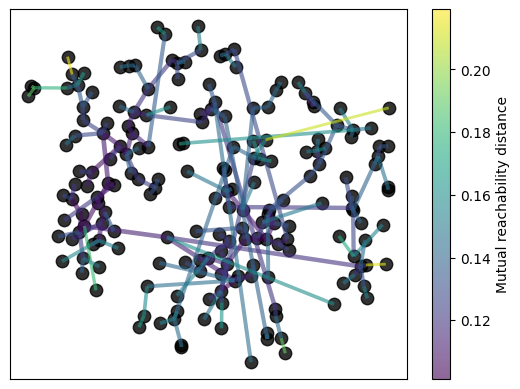

In [78]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<Axes: ylabel='distance'>

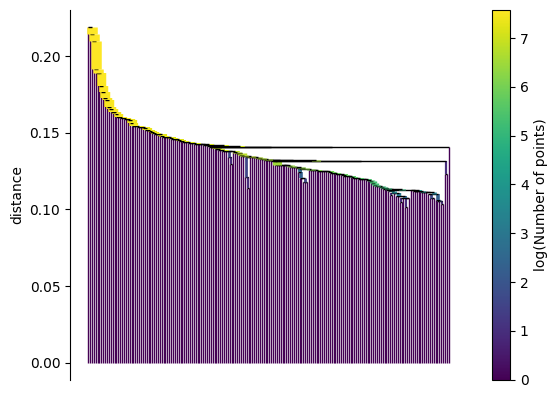

In [79]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<Axes: ylabel='$\\lambda$ value'>

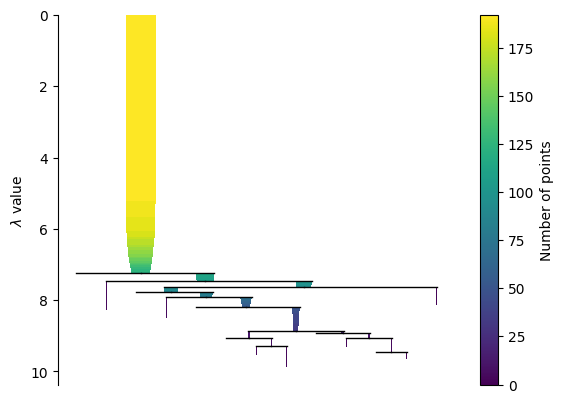

In [80]:
clusterer.condensed_tree_.plot()

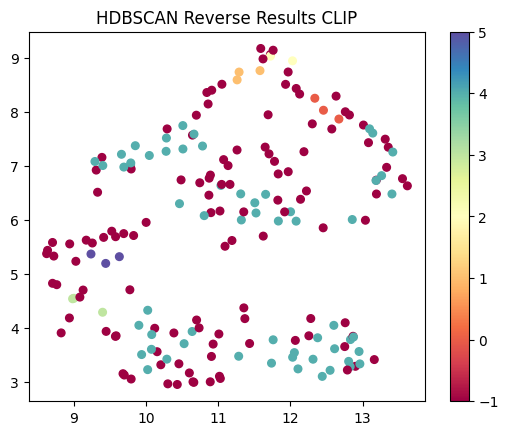

In [85]:
embedding_2d = umap.UMAP(n_components=2).fit_transform(combined)

plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_labels, cmap='Spectral', s=30)
plt.title("HDBSCAN Reverse Results CLIP")
plt.colorbar()
plt.show()

In [82]:
hdb_rev_df = pd.DataFrame({
    "name": [f.split("_")[0] for f in rev_files],   # „Coin23_obv“ → „Coin23“
    "cluster": cluster_labels
})

hdb_rev_df.to_csv("coins_for_viewer_2_hbd_GT_rev", index=False)

C:\Users\edvin\AppData\Local\Temp\ipykernel_3880\2388584162.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


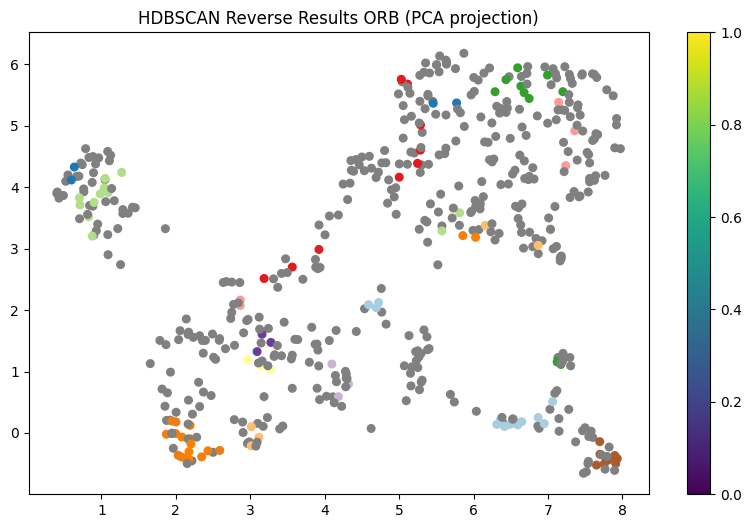

In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import hdbscan

# 1. Use PCA instead of t-SNE for projection
from sklearn.decomposition import PCA
projection = embedding_2d

# 3. Color palette and base colors
color_palette = sns.color_palette('Paired', len(set(clusterer.labels_)))
cluster_colors = [
    color_palette[label] if label >= 0 else (0.5, 0.5, 0.5)
    for label in clusterer.labels_
]

# 4. Desaturate colors by cluster membership strength (probability)
cluster_member_colors = [
    sns.desaturate(color, prob)
    for color, prob in zip(cluster_colors, clusterer.probabilities_)
]

# 5. Plot
plt.figure(figsize=(10, 6))
plt.title("HDBSCAN Reverse Results ORB (PCA projection)")
plt.scatter(
    projection[:, 0], projection[:, 1],
    s=30,
    c=cluster_member_colors,
    alpha=1,
    cmap='Spectral'
)

plt.colorbar()
plt.show()


In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(obv_xy[:, 0], obv_xy[:, 1], c=hdb_labels, cmap='tab20', s=10)
plt.title("HDBSCAN Clusters")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()